In [1]:
# Import tutto quanto
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import copy

In [2]:
# LOADING DATA

df=pd.read_csv("ICU_Challenge_Dataset.csv", sep=",")
df_description = df.describe()
columns = df.columns


In [3]:
# MISSING DATA - da esplorare
# print(df[df.columns[df.isna().any()]])
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
print(missing_value_df)

                         column_name  percent_missing
recordid                    recordid         0.000000
SAPS-I                        SAPS-I         0.000000
SOFA                            SOFA         0.000000
In-hospital_death  In-hospital_death         0.000000
Age                              Age         0.000000
...                              ...              ...
TroponinT_first      TroponinT_first        77.766667
Cholesterol_last    Cholesterol_last        92.133333
Cholesterol_first  Cholesterol_first        92.133333
TroponinI_last        TroponinI_last        95.250000
TroponinI_first      TroponinI_first        95.250000

[121 rows x 2 columns]


In [4]:
df_col_keep = missing_value_df[missing_value_df['percent_missing']<50]
df_col = df_col_keep['column_name']

df=df[df_col]
df

,recordid,SAPS-I,SOFA,In-hospital_death,Age,CCU,CSRU,SICU,Gender,BUN_first,...,Weight_first,FiO2_last,FiO2_first,MechVentDuration,MechVentStartTime,UrineOutputSum,MechVentLast8Hour,Lactate_first,Lactate_last,Height
0,132539,6,1,0,54.0,0,0,1,0.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,132540,16,8,0,76.0,0,1,0,1.0,16.0,...,80.6,0.40,1.0,360.0,71.0,5.0,0.0,NaN,NaN,175.3
2,132541,21,11,0,44.0,0,0,0,0.0,8.0,...,56.7,0.40,1.0,2160.0,617.0,14.0,1.0,1.3,0.9,NaN
3,132543,7,1,0,68.0,0,0,0,1.0,23.0,...,84.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.3
4,132545,17,2,0,88.0,0,0,0,0.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,151939,19,6,1,52.0,0,0,1,1.0,11.0,...,NaN,0.40,0.6,2440.0,238.0,17.0,1.0,NaN,NaN,NaN
5996,151383,13,2,0,90.0,1,0,0,0.0,20.0,...,72.9,1.00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,157.5
5997,149623,12,9,0,72.0,1,0,0,0.0,62.0,...,NaN,0.35,0.5,1200.0,188.0,10.0,0.0,1.4,1.4,NaN
5998,145366,18,11,1,52.0,0,0,0,1.0,16.0,...,95.9,0.50,1.0,2760.0,100.0,27.0,1.0,9.9,8.2,182.9


In [5]:
print(np.unique(df.dtypes))

int_var = list(df.columns[df.dtypes == np.int64])
float_var = list(df.columns[df.dtypes == np.float64])

cat_var = []
num_var = []
for cat in list(df.columns):
    if len(df[cat].unique()) <=3: #conta anche i Nan come valori
        cat_var.append(cat)
    else:
        num_var.append(cat)

categorical_df = df[cat_var]
numerical_df = df[num_var]

[dtype('int64') dtype('float64')]


In [7]:
#normal test and for similarity
#different
df = df.drop(['BUN_first', 'Creatinine_first', 'Na_first', 'Weight_first'], axis=1)
df_copia = df
df

KeyError: "['BUN_first', 'Creatinine_first', 'Na_first', 'Weight_first'] not found in axis"

In [ ]:
df['HCT_diff'] = df['HCT_first'] - df['HCT_last']
df['HR_diff'] = df['HR_first'] - df['HR_last']
df['Temp_diff'] = df['Temp_first'] - df['Temp_last']
df['GCS_diff'] = df['GCS_first'] - df['GCS_last']
df['Platelets_diff'] = df['Platelets_first'] - df['Platelets_last']
df['HCO3_diff'] = df['HCO3_first'] - df['HCO3_last']
df['K_diff'] = df['K_first'] - df['K_last']
df['WBC_diff'] = df['WBC_first'] - df['WBC_last']
df['Mg_diff'] = df['Mg_first'] - df['Mg_last']
df['Glucose_diff'] = df['Glucose_first'] - df['Glucose_last']
df['NISysABP_diff'] = df['NISysABP_first'] - df['NISysABP_last']
df['NIDiasABP_diff'] = df['NIDiasABP_first'] - df['NIDiasABP_last']
df['pH_diff'] = df['pH_first'] - df['pH_last']
df['PaO2_diff'] = df['PaO2_first'] - df['PaO2_last']
df['PaCO2_diff'] = df['PaCO2_first'] - df['PaCO2_last']
df['MAP_diff'] = df['MAP_first'] - df['MAP_last']
df['SysABP_diff'] = df['SysABP_first'] - df['SysABP_last']
df['DiasABP_diff'] = df['DiasABP_first'] - df['DiasABP_last']
df['FiO2_diff'] = df['FiO2_first'] - df['FiO2_last']
df['Lactate_diff'] = df['Lactate_first'] - df['Lactate_last']

df = df.drop(['HCT_first', 'HCT_last', 'HR_first', 'HR_last', 'Temp_first', 'Temp_last', 'GCS_first', 'GCS_last', 'Platelets_first', 'Platelets_last', 'HCO3_first', 'HCO3_last', 'K_first', 'K_last', 'WBC_first', 'WBC_last', 'Mg_first', 'Mg_last', 'Glucose_first', 'Glucose_last', 'NISysABP_first', 'NISysABP_last', 'NIDiasABP_first', 'NIDiasABP_last', 'pH_first', 'pH_last', 'PaO2_first', 'PaO2_last', 'PaCO2_first', 'PaCO2_last',  'MAP_first', 'MAP_last', 'SysABP_first', 'SysABP_last', 'DiasABP_first', 'DiasABP_last', 'FiO2_first', 'FiO2_last', 'Lactate_first', 'Lactate_last' ], axis=1)
df

In [8]:
def plot_correlation_heatmap(df):
    plt.figure(figsize=(20,20))
    corr = df.corr()
    ax = sns.heatmap(
        corr,
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True, annot=True
    )
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right'
    )
    ax.set_yticklabels(
        ax.get_yticklabels(),
        rotation=45,

    );

In [9]:
cat_var = []
num_var = []
for cat in list(df.columns):
    if len(df[cat].unique()) <=3: #conta anche i Nan come valori
        cat_var.append(cat)
    else:
        num_var.append(cat)

categorical_df = df[cat_var]
numerical_df = df[num_var]

In [10]:
numerical_df

,recordid,SAPS-I,SOFA,Age,Creatinine_last,BUN_last,HCT_first,HCT_last,HR_first,HR_median,...,DiasABP_median,Weight_last,FiO2_last,FiO2_first,MechVentDuration,MechVentStartTime,UrineOutputSum,Lactate_first,Lactate_last,Height
0,132539,6,1,54.0,0.7,8.0,33.7,30.3,73.0,73.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,132540,16,8,76.0,1.3,21.0,24.7,29.4,88.0,80.0,...,59.0,81.6,0.40,1.0,360.0,71.0,5.0,NaN,NaN,175.3
2,132541,21,11,44.0,0.3,3.0,28.5,29.4,100.0,85.5,...,67.0,56.7,0.40,1.0,2160.0,617.0,14.0,1.3,0.9,NaN
3,132543,7,1,68.0,0.7,10.0,41.3,36.3,79.0,74.0,...,NaN,84.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.3
4,132545,17,2,88.0,1.0,25.0,22.6,30.9,93.0,73.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,151939,19,6,52.0,0.6,9.0,30.3,26.8,68.0,101.0,...,55.0,NaN,0.40,0.6,2440.0,238.0,17.0,NaN,NaN,NaN
5996,151383,13,2,90.0,0.7,23.0,26.0,32.0,88.0,108.0,...,89.5,68.5,1.00,1.0,NaN,NaN,NaN,NaN,NaN,157.5
5997,149623,12,9,72.0,2.8,67.0,34.9,32.0,103.0,100.0,...,56.0,NaN,0.35,0.5,1200.0,188.0,10.0,1.4,1.4,NaN
5998,145366,18,11,52.0,1.0,25.0,18.0,24.7,143.0,108.0,...,49.0,96.2,0.50,1.0,2760.0,100.0,27.0,9.9,8.2,182.9


In [11]:
numerical_df
to_drop = []

for x in list(numerical_df.columns):
    if 'highest' in x:
        to_drop.append(x)
    if 'median' in x:
        to_drop.append(x)
    if 'lowest' in x:
        to_drop.append(x)
to_drop

['HR_median',
 'HR_highest',
 'HR_lowest',
 'Temp_median',
 'Temp_highest',
 'GCS_highest',
 'Temp_lowest',
 'GCS_lowest',
 'GCS_median',
 'Glucose_lowest',
 'Glucose_median',
 'Glucose_highest',
 'NISysABP_median',
 'NISysABP_highest',
 'NISysABP_lowest',
 'NIDiasABP_lowest',
 'NIMAP_lowest',
 'NIMAP_median',
 'NIDiasABP_median',
 'NIMAP_highest',
 'NIDiasABP_highest',
 'MAP_lowest',
 'MAP_highest',
 'MAP_median',
 'SysABP_median',
 'SysABP_highest',
 'SysABP_lowest',
 'DiasABP_lowest',
 'DiasABP_highest',
 'DiasABP_median']

In [12]:
numerical_df = numerical_df.drop(to_drop, axis=1)
numerical_df

,recordid,SAPS-I,SOFA,Age,Creatinine_last,BUN_last,HCT_first,HCT_last,HR_first,HR_last,...,DiasABP_first,Weight_last,FiO2_last,FiO2_first,MechVentDuration,MechVentStartTime,UrineOutputSum,Lactate_first,Lactate_last,Height
0,132539,6,1,54.0,0.7,8.0,33.7,30.3,73.0,86.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,132540,16,8,76.0,1.3,21.0,24.7,29.4,88.0,65.0,...,67.0,81.6,0.40,1.0,360.0,71.0,5.0,NaN,NaN,175.3
2,132541,21,11,44.0,0.3,3.0,28.5,29.4,100.0,71.0,...,81.0,56.7,0.40,1.0,2160.0,617.0,14.0,1.3,0.9,NaN
3,132543,7,1,68.0,0.7,10.0,41.3,36.3,79.0,79.0,...,NaN,84.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.3
4,132545,17,2,88.0,1.0,25.0,22.6,30.9,93.0,68.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,151939,19,6,52.0,0.6,9.0,30.3,26.8,68.0,104.0,...,59.0,NaN,0.40,0.6,2440.0,238.0,17.0,NaN,NaN,NaN
5996,151383,13,2,90.0,0.7,23.0,26.0,32.0,88.0,98.0,...,90.0,68.5,1.00,1.0,NaN,NaN,NaN,NaN,NaN,157.5
5997,149623,12,9,72.0,2.8,67.0,34.9,32.0,103.0,109.0,...,75.0,NaN,0.35,0.5,1200.0,188.0,10.0,1.4,1.4,NaN
5998,145366,18,11,52.0,1.0,25.0,18.0,24.7,143.0,70.0,...,47.0,96.2,0.50,1.0,2760.0,100.0,27.0,9.9,8.2,182.9


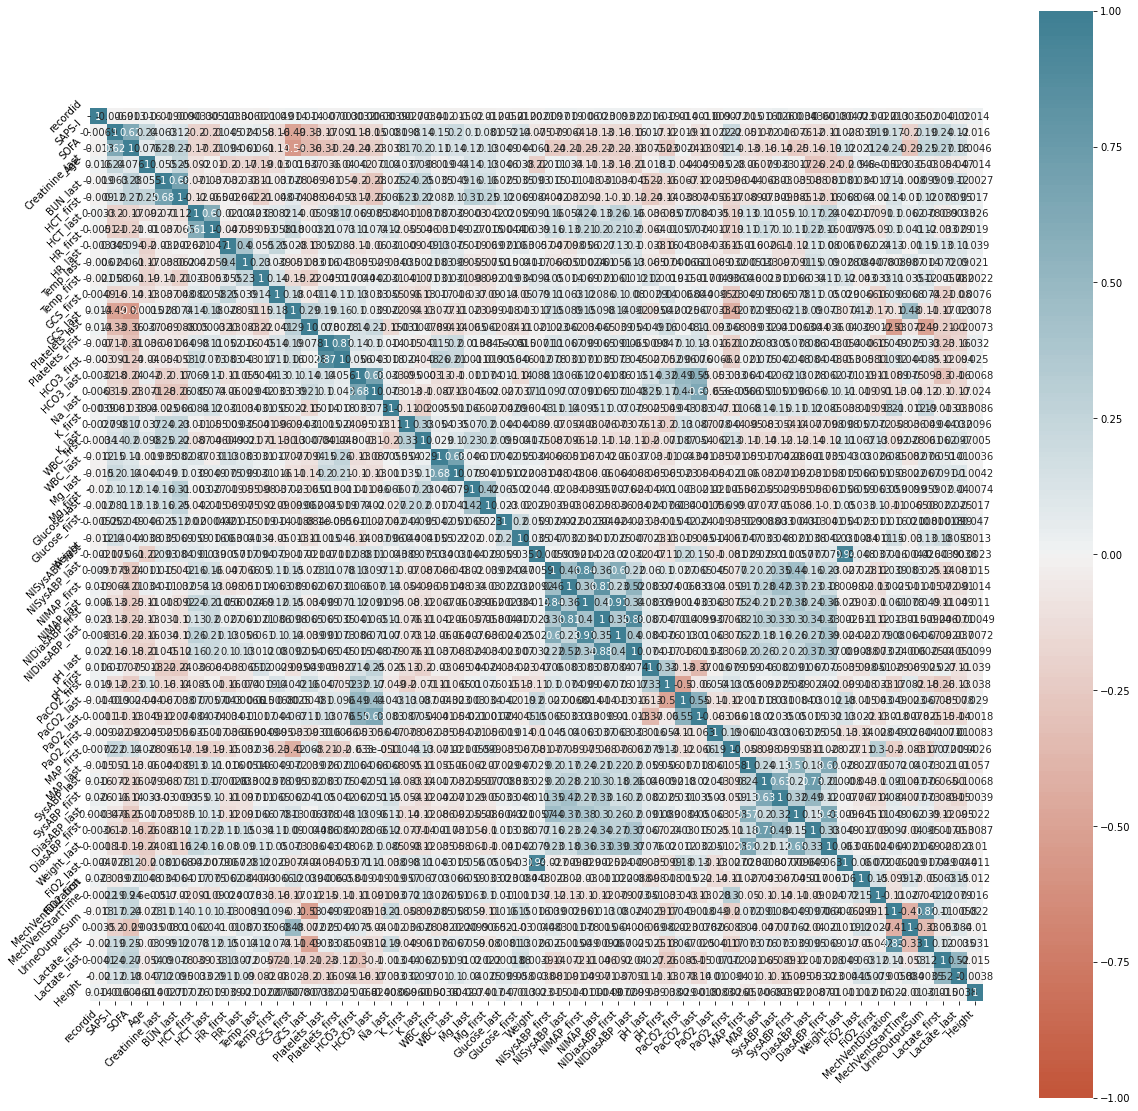

In [13]:
numerical_df
plot_correlation_heatmap(numerical_df)

In [14]:
mean_values = numerical_df.mean()
mean_values

recordid             140965.097167
SAPS-I                   14.170333
SOFA                      6.345500
Age                      64.568500
Creatinine_last           1.358106
BUN_last                 25.456378
HCT_first                31.951559
HCT_last                 30.835158
HR_first                 89.560658
HR_last                  85.790063
Temp_last                37.023389
Temp_first               36.568836
GCS_first                10.111601
GCS_last                 12.412653
Platelets_last          191.872757
Platelets_first         215.501103
HCO3_first               23.172584
HCO3_last                24.250722
Na_last                 138.878016
K_first                   4.183643
K_last                    4.069674
WBC_first                12.847697
WBC_last                 12.238679
Mg_last                   2.045350
Mg_first                  1.936072
Glucose_last            128.352730
Glucose_first           148.760226
Weight                   81.332485
NISysABP_first      

In [15]:
numerical_df = numerical_df.fillna(value=mean_values)
numerical_df.isnull().sum()

recordid             0
SAPS-I               0
SOFA                 0
Age                  0
Creatinine_last      0
BUN_last             0
HCT_first            0
HCT_last             0
HR_first             0
HR_last              0
Temp_last            0
Temp_first           0
GCS_first            0
GCS_last             0
Platelets_last       0
Platelets_first      0
HCO3_first           0
HCO3_last            0
Na_last              0
K_first              0
K_last               0
WBC_first            0
WBC_last             0
Mg_last              0
Mg_first             0
Glucose_last         0
Glucose_first        0
Weight               0
NISysABP_first       0
NISysABP_last        0
NIMAP_first          0
NIMAP_last           0
NIDiasABP_first      0
NIDiasABP_last       0
pH_last              0
pH_first             0
PaCO2_first          0
PaCO2_last           0
PaO2_last            0
PaO2_first           0
MAP_first            0
MAP_last             0
SysABP_last          0
SysABP_firs

array([[<AxesSubplot:title={'center':'recordid'}>,
        <AxesSubplot:title={'center':'SAPS-I'}>,
        <AxesSubplot:title={'center':'SOFA'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Creatinine_last'}>,
        <AxesSubplot:title={'center':'BUN_last'}>,
        <AxesSubplot:title={'center':'HCT_first'}>],
       [<AxesSubplot:title={'center':'HCT_last'}>,
        <AxesSubplot:title={'center':'HR_first'}>,
        <AxesSubplot:title={'center':'HR_last'}>,
        <AxesSubplot:title={'center':'Temp_last'}>,
        <AxesSubplot:title={'center':'Temp_first'}>,
        <AxesSubplot:title={'center':'GCS_first'}>,
        <AxesSubplot:title={'center':'GCS_last'}>],
       [<AxesSubplot:title={'center':'Platelets_last'}>,
        <AxesSubplot:title={'center':'Platelets_first'}>,
        <AxesSubplot:title={'center':'HCO3_first'}>,
        <AxesSubplot:title={'center':'HCO3_last'}>,
        <AxesSubplot:title={'center':'Na_last'}>,
        <AxesS

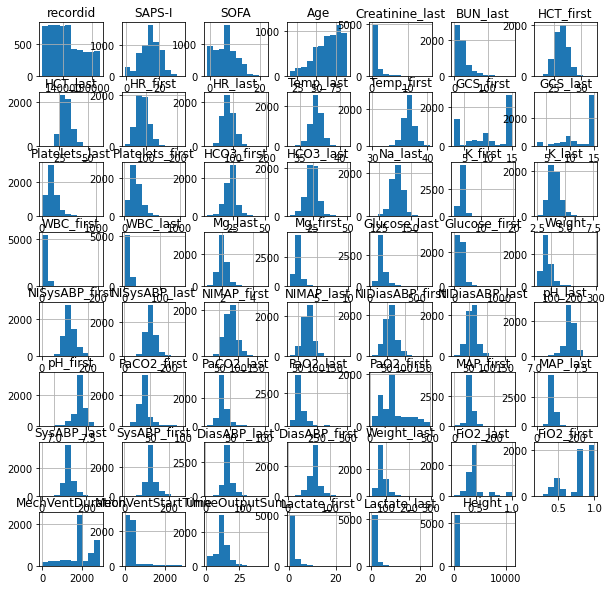

In [16]:
numerical_df.hist(figsize=(10,10))

In [17]:
import matplotlib.pyplot as plt
crea_log = np.log(numerical_df['Creatinine_last'])

/Users/saracaramaschi/GitHub/Metro/teo/NLPLab/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

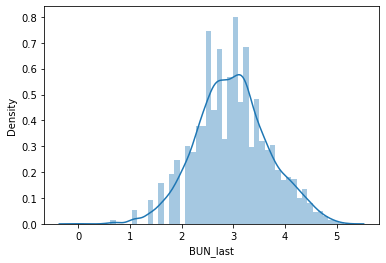

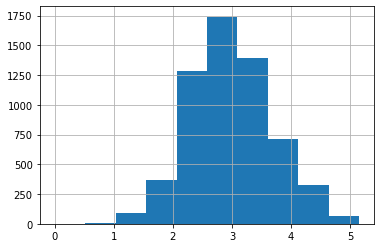

In [18]:
import matplotlib.pyplot as plt
bun_log= np.log(numerical_df['BUN_last'])
sns.distplot(bun_log)
fig = plt.figure()
bun_log.hist()

In [19]:
numerical_df=numerical_df.drop(['Creatinine_last', 'BUN_last'], axis=1)
numerical_df.insert(2, 'Creatinine_last_log', crea_log)
numerical_df.insert(3, 'BUN_last_log', bun_log)
numerical_df

,recordid,SAPS-I,Creatinine_last_log,BUN_last_log,SOFA,Age,HCT_first,HCT_last,HR_first,HR_last,...,DiasABP_first,Weight_last,FiO2_last,FiO2_first,MechVentDuration,MechVentStartTime,UrineOutputSum,Lactate_first,Lactate_last,Height
0,132539,6,-0.356675,2.079442,1,54.0,33.7,30.3,73.0,86.0,...,62.378876,84.73959,0.502689,0.781928,1900.302885,288.830395,12.161859,2.609942,1.96219,174.775374
1,132540,16,0.262364,3.044522,8,76.0,24.7,29.4,88.0,65.0,...,67.000000,81.60000,0.400000,1.000000,360.000000,71.000000,5.000000,2.609942,1.96219,175.300000
2,132541,21,-1.203973,1.098612,11,44.0,28.5,29.4,100.0,71.0,...,81.000000,56.70000,0.400000,1.000000,2160.000000,617.000000,14.000000,1.300000,0.90000,174.775374
3,132543,7,-0.356675,2.302585,1,68.0,41.3,36.3,79.0,79.0,...,62.378876,84.60000,0.502689,0.781928,1900.302885,288.830395,12.161859,2.609942,1.96219,180.300000
4,132545,17,0.000000,3.218876,2,88.0,22.6,30.9,93.0,68.0,...,62.378876,84.73959,0.502689,0.781928,1900.302885,288.830395,12.161859,2.609942,1.96219,174.775374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,151939,19,-0.510826,2.197225,6,52.0,30.3,26.8,68.0,104.0,...,59.000000,84.73959,0.400000,0.600000,2440.000000,238.000000,17.000000,2.609942,1.96219,174.775374
5996,151383,13,-0.356675,3.135494,2,90.0,26.0,32.0,88.0,98.0,...,90.000000,68.50000,1.000000,1.000000,1900.302885,288.830395,12.161859,2.609942,1.96219,157.500000
5997,149623,12,1.029619,4.204693,9,72.0,34.9,32.0,103.0,109.0,...,75.000000,84.73959,0.350000,0.500000,1200.000000,188.000000,10.000000,1.400000,1.40000,174.775374
5998,145366,18,0.000000,3.218876,11,52.0,18.0,24.7,143.0,70.0,...,47.000000,96.20000,0.500000,1.000000,2760.000000,100.000000,27.000000,9.900000,8.20000,182.900000


In [20]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(numerical_df)
scaled_df=pd.DataFrame(scaler.transform(numerical_df))
scaled_df.columns = numerical_df.columns

scaled_df

,recordid,SAPS-I,Creatinine_last_log,BUN_last_log,SOFA,Age,HCT_first,HCT_last,HR_first,HR_last,...,DiasABP_first,Weight_last,FiO2_last,FiO2_first,MechVentDuration,MechVentStartTime,UrineOutputSum,Lactate_first,Lactate_last,Height
0,-1.508884,-1.342626,-0.629755,-1.280057,-1.264658,-0.604645,0.296532,-0.116124,-0.830721,0.012161,...,0.000000,0.000000,0.000000,0.000000,-3.293541e-16,0.000000,0.000000,0.000000,1.889005e-16,1.881342e-16
1,-1.508705,0.300668,0.333993,0.085820,0.391428,0.654019,-1.229849,-0.311416,-0.078286,-1.204318,...,0.394241,-0.156409,-0.770187,1.051361,-2.231151e+00,-0.564428,-1.556534,0.000000,1.889005e-16,3.472704e-03
2,-1.508526,1.122315,-1.948867,-2.668222,1.101179,-1.176765,-0.585377,-0.311416,0.523662,-0.856753,...,1.588620,-1.396883,-0.770187,1.051361,3.761750e-01,0.850332,0.399495,-0.827507,-9.036398e-01,1.881342e-16
3,-1.508168,-1.178297,-0.629755,-0.964242,-1.264658,0.196323,1.585476,1.185819,-0.529747,-0.393332,...,0.000000,-0.006954,0.000000,0.000000,-3.293541e-16,0.000000,0.000000,0.000000,1.889005e-16,3.656963e-02
4,-1.507810,0.464998,-0.074468,0.332582,-1.028074,1.340564,-1.586005,0.014070,0.172525,-1.030536,...,0.000000,0.000000,0.000000,0.000000,-3.293541e-16,0.000000,0.000000,0.000000,1.889005e-16,1.881342e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1.965126,0.793656,-0.869744,-1.113358,-0.081740,-0.719069,-0.280101,-0.875591,-1.081533,1.054858,...,-0.288261,0.000000,-0.770187,-0.877109,7.817591e-01,-0.131708,1.051505,0.000000,1.889005e-16,1.881342e-16
5996,1.865562,-0.192320,-0.629755,0.214572,-1.028074,1.454988,-1.009372,0.252760,-0.078286,0.707292,...,2.356435,-0.809028,3.729931,1.051361,-3.293541e-16,0.000000,0.000000,0.000000,1.889005e-16,-1.143523e-01
5997,1.550394,-0.356650,1.528490,1.727806,0.628011,0.425171,0.500050,0.252760,0.674149,1.344496,...,1.076743,0.000000,-1.145196,-1.359227,-1.014399e+00,-0.261265,-0.469851,-0.764335,-4.782736e-01,1.881342e-16
5998,0.788082,0.629327,-0.074468,0.332582,1.101179,-0.719069,-2.366156,-1.331271,2.680642,-0.914680,...,-1.312015,0.570937,-0.020167,1.051361,1.245284e+00,-0.489285,3.224871,4.605222,5.306706e+00,5.378003e-02


In [21]:
frames=[scaled_df, categorical_df]
df_3 = pd.concat(frames, axis=1)
df_3

,recordid,SAPS-I,Creatinine_last_log,BUN_last_log,SOFA,Age,HCT_first,HCT_last,HR_first,HR_last,...,UrineOutputSum,Lactate_first,Lactate_last,Height,In-hospital_death,CCU,CSRU,SICU,Gender,MechVentLast8Hour
0,-1.508884,-1.342626,-0.629755,-1.280057,-1.264658,-0.604645,0.296532,-0.116124,-0.830721,0.012161,...,0.000000,0.000000,1.889005e-16,1.881342e-16,0,0,0,1,0.0,NaN
1,-1.508705,0.300668,0.333993,0.085820,0.391428,0.654019,-1.229849,-0.311416,-0.078286,-1.204318,...,-1.556534,0.000000,1.889005e-16,3.472704e-03,0,0,1,0,1.0,0.0
2,-1.508526,1.122315,-1.948867,-2.668222,1.101179,-1.176765,-0.585377,-0.311416,0.523662,-0.856753,...,0.399495,-0.827507,-9.036398e-01,1.881342e-16,0,0,0,0,0.0,1.0
3,-1.508168,-1.178297,-0.629755,-0.964242,-1.264658,0.196323,1.585476,1.185819,-0.529747,-0.393332,...,0.000000,0.000000,1.889005e-16,3.656963e-02,0,0,0,0,1.0,NaN
4,-1.507810,0.464998,-0.074468,0.332582,-1.028074,1.340564,-1.586005,0.014070,0.172525,-1.030536,...,0.000000,0.000000,1.889005e-16,1.881342e-16,0,0,0,0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1.965126,0.793656,-0.869744,-1.113358,-0.081740,-0.719069,-0.280101,-0.875591,-1.081533,1.054858,...,1.051505,0.000000,1.889005e-16,1.881342e-16,1,0,0,1,1.0,1.0
5996,1.865562,-0.192320,-0.629755,0.214572,-1.028074,1.454988,-1.009372,0.252760,-0.078286,0.707292,...,0.000000,0.000000,1.889005e-16,-1.143523e-01,0,1,0,0,0.0,NaN
5997,1.550394,-0.356650,1.528490,1.727806,0.628011,0.425171,0.500050,0.252760,0.674149,1.344496,...,-0.469851,-0.764335,-4.782736e-01,1.881342e-16,0,1,0,0,0.0,0.0
5998,0.788082,0.629327,-0.074468,0.332582,1.101179,-0.719069,-2.366156,-1.331271,2.680642,-0.914680,...,3.224871,4.605222,5.306706e+00,5.378003e-02,1,0,0,0,1.0,1.0


In [22]:
categorical_df.isnull().sum()

In-hospital_death       0
CCU                     0
CSRU                    0
SICU                    0
Gender                  6
MechVentLast8Hour    2256
dtype: int64

In [23]:
#tolgo righe con genere nan
indexNames = df_3[df_3['Gender'].isnull()].index
df_3.drop(indexNames, inplace=True)
df_3

,recordid,SAPS-I,Creatinine_last_log,BUN_last_log,SOFA,Age,HCT_first,HCT_last,HR_first,HR_last,...,UrineOutputSum,Lactate_first,Lactate_last,Height,In-hospital_death,CCU,CSRU,SICU,Gender,MechVentLast8Hour
0,-1.508884,-1.342626,-0.629755,-1.280057,-1.264658,-0.604645,0.296532,-0.116124,-0.830721,0.012161,...,0.000000,0.000000,1.889005e-16,1.881342e-16,0,0,0,1,0.0,NaN
1,-1.508705,0.300668,0.333993,0.085820,0.391428,0.654019,-1.229849,-0.311416,-0.078286,-1.204318,...,-1.556534,0.000000,1.889005e-16,3.472704e-03,0,0,1,0,1.0,0.0
2,-1.508526,1.122315,-1.948867,-2.668222,1.101179,-1.176765,-0.585377,-0.311416,0.523662,-0.856753,...,0.399495,-0.827507,-9.036398e-01,1.881342e-16,0,0,0,0,0.0,1.0
3,-1.508168,-1.178297,-0.629755,-0.964242,-1.264658,0.196323,1.585476,1.185819,-0.529747,-0.393332,...,0.000000,0.000000,1.889005e-16,3.656963e-02,0,0,0,0,1.0,NaN
4,-1.507810,0.464998,-0.074468,0.332582,-1.028074,1.340564,-1.586005,0.014070,0.172525,-1.030536,...,0.000000,0.000000,1.889005e-16,1.881342e-16,0,0,0,0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1.965126,0.793656,-0.869744,-1.113358,-0.081740,-0.719069,-0.280101,-0.875591,-1.081533,1.054858,...,1.051505,0.000000,1.889005e-16,1.881342e-16,1,0,0,1,1.0,1.0
5996,1.865562,-0.192320,-0.629755,0.214572,-1.028074,1.454988,-1.009372,0.252760,-0.078286,0.707292,...,0.000000,0.000000,1.889005e-16,-1.143523e-01,0,1,0,0,0.0,NaN
5997,1.550394,-0.356650,1.528490,1.727806,0.628011,0.425171,0.500050,0.252760,0.674149,1.344496,...,-0.469851,-0.764335,-4.782736e-01,1.881342e-16,0,1,0,0,0.0,0.0
5998,0.788082,0.629327,-0.074468,0.332582,1.101179,-0.719069,-2.366156,-1.331271,2.680642,-0.914680,...,3.224871,4.605222,5.306706e+00,5.378003e-02,1,0,0,0,1.0,1.0


In [24]:
#tolgo righe con mech nan
indexNames = df_3[df_3['MechVentLast8Hour'].isnull()].index
df_3.drop(indexNames, inplace=True)
df_3

,recordid,SAPS-I,Creatinine_last_log,BUN_last_log,SOFA,Age,HCT_first,HCT_last,HR_first,HR_last,...,UrineOutputSum,Lactate_first,Lactate_last,Height,In-hospital_death,CCU,CSRU,SICU,Gender,MechVentLast8Hour
1,-1.508705,0.300668,0.333993,0.085820,0.391428,0.654019,-1.229849,-0.311416,-0.078286,-1.204318,...,-1.556534,0.000000,1.889005e-16,3.472704e-03,0,0,1,0,1.0,0.0
2,-1.508526,1.122315,-1.948867,-2.668222,1.101179,-1.176765,-0.585377,-0.311416,0.523662,-0.856753,...,0.399495,-0.827507,-9.036398e-01,1.881342e-16,0,0,0,0,0.0,1.0
5,-1.507451,-0.027991,-0.629755,-0.299047,1.101179,-0.032525,1.636356,1.012227,-0.579909,0.359727,...,-0.035178,0.000000,1.889005e-16,3.656963e-02,0,1,0,0,1.0,1.0
7,-1.506735,0.793656,-0.869744,1.523650,0.391428,0.768443,0.109974,0.469750,1.075447,-1.609812,...,-0.035178,-0.764335,-1.379807e-01,-8.059348e-02,1,0,0,0,0.0,1.0
9,-1.506019,-0.027991,0.333993,0.151660,-0.081740,0.539595,-0.076583,-0.528406,-1.131695,-0.451260,...,-1.773871,0.000000,1.889005e-16,3.472704e-03,0,0,1,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5994,1.854997,0.300668,0.209379,-0.299047,0.864595,0.882867,0.991884,0.513149,-0.078286,0.881075,...,-1.773871,0.000000,1.889005e-16,2.002117e-02,0,0,1,0,1.0,0.0
5995,1.965126,0.793656,-0.869744,-1.113358,-0.081740,-0.719069,-0.280101,-0.875591,-1.081533,1.054858,...,1.051505,0.000000,1.889005e-16,1.881342e-16,1,0,0,1,1.0,1.0
5997,1.550394,-0.356650,1.528490,1.727806,0.628011,0.425171,0.500050,0.252760,0.674149,1.344496,...,-0.469851,-0.764335,-4.782736e-01,1.881342e-16,0,1,0,0,0.0,0.0
5998,0.788082,0.629327,-0.074468,0.332582,1.101179,-0.719069,-2.366156,-1.331271,2.680642,-0.914680,...,3.224871,4.605222,5.306706e+00,5.378003e-02,1,0,0,0,1.0,1.0


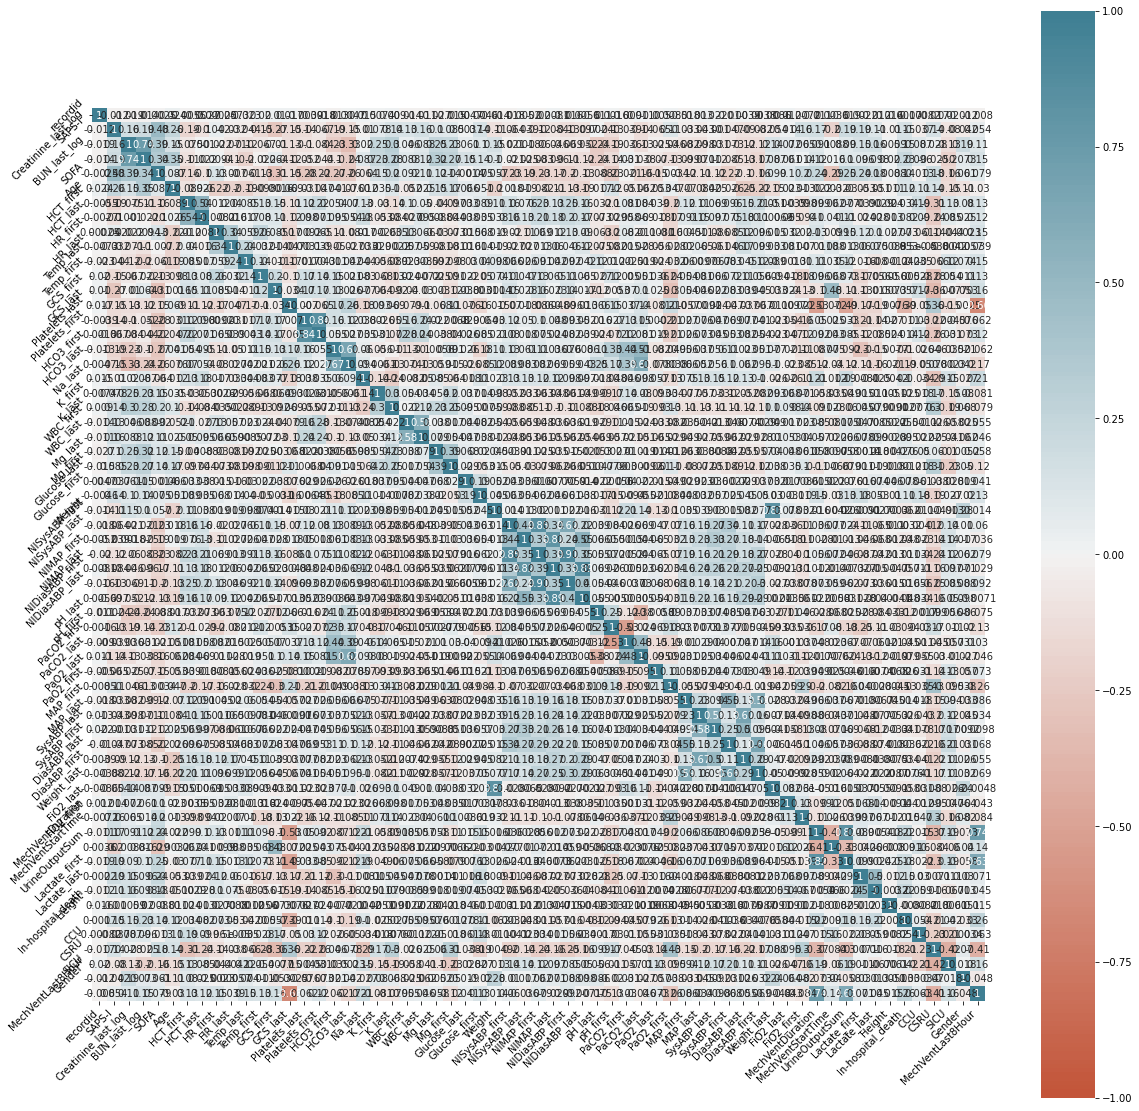

In [25]:
plot_correlation_heatmap(df_3)

In [26]:
df_3=df_3.drop(['recordid'], axis=1)
df_3

,SAPS-I,Creatinine_last_log,BUN_last_log,SOFA,Age,HCT_first,HCT_last,HR_first,HR_last,Temp_last,...,UrineOutputSum,Lactate_first,Lactate_last,Height,In-hospital_death,CCU,CSRU,SICU,Gender,MechVentLast8Hour
1,0.300668,0.333993,0.085820,0.391428,0.654019,-1.229849,-0.311416,-0.078286,-1.204318,0.106137,...,-1.556534,0.000000,1.889005e-16,3.472704e-03,0,0,1,0,1.0,0.0
2,1.122315,-1.948867,-2.668222,1.101179,-1.176765,-0.585377,-0.311416,0.523662,-0.856753,0.244676,...,0.399495,-0.827507,-9.036398e-01,1.881342e-16,0,0,0,0,0.0,1.0
5,-0.027991,-0.629755,-0.299047,1.101179,-0.032525,1.636356,1.012227,-0.579909,0.359727,0.383215,...,-0.035178,0.000000,1.889005e-16,3.656963e-02,0,1,0,0,1.0,1.0
7,0.793656,-0.869744,1.523650,0.391428,0.768443,0.109974,0.469750,1.075447,-1.609812,-0.586559,...,-0.035178,-0.764335,-1.379807e-01,-8.059348e-02,1,0,0,0,0.0,1.0
9,-0.027991,0.333993,0.151660,-0.081740,0.539595,-0.076583,-0.528406,-1.131695,-0.451260,0.521754,...,-1.773871,0.000000,1.889005e-16,3.472704e-03,0,0,1,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5994,0.300668,0.209379,-0.299047,0.864595,0.882867,0.991884,0.513149,-0.078286,0.881075,0.106137,...,-1.773871,0.000000,1.889005e-16,2.002117e-02,0,0,1,0,1.0,0.0
5995,0.793656,-0.869744,-1.113358,-0.081740,-0.719069,-0.280101,-0.875591,-1.081533,1.054858,0.798832,...,1.051505,0.000000,1.889005e-16,1.881342e-16,1,0,0,1,1.0,1.0
5997,-0.356650,1.528490,1.727806,0.628011,0.425171,0.500050,0.252760,0.674149,1.344496,-0.170942,...,-0.469851,-0.764335,-4.782736e-01,1.881342e-16,0,1,0,0,0.0,0.0
5998,0.629327,-0.074468,0.332582,1.101179,-0.719069,-2.366156,-1.331271,2.680642,-0.914680,0.106137,...,3.224871,4.605222,5.306706e+00,5.378003e-02,1,0,0,0,1.0,1.0


In [49]:
df_3.to_csv('df_3.csv', index=False)